RANDOM FOREST TASKS (CUSTOMER CHURN)

In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [226]:
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [227]:
print(df.shape)
print(df.columns)

(7043, 21)
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [228]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [230]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [231]:
df.duplicated().sum()

np.int64(0)

In [232]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')   #it converts invalid to NaN
df['TotalCharges']=df['TotalCharges'].fillna(0).astype(int)   #replace Nan with 0 and convert to int

In [233]:
for i in ['tenure','MonthlyCharges','TotalCharges']:
  Q1=df[i].quantile(0.25)
  Q3=df[i].quantile(0.75)
  IQR=Q3-Q1
  lower=Q1-1.5*IQR
  upper=Q3+1.5*IQR
  outlier=((df[i]<lower)|(df[i]>upper)).sum()
  print(f'{i}:{outlier} outliers')

tenure:0 outliers
MonthlyCharges:0 outliers
TotalCharges:0 outliers


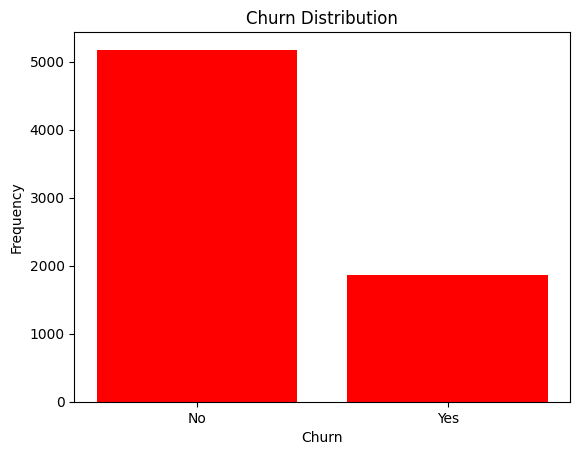

In [234]:
churn_value=df['Churn'].value_counts()
plt.bar(churn_value.index,churn_value.values,color='red')
plt.xlabel('Churn')
plt.ylabel('Frequency')
plt.title('Churn Distribution')
plt.savefig('plots/churn_distribution.png')
plt.show()

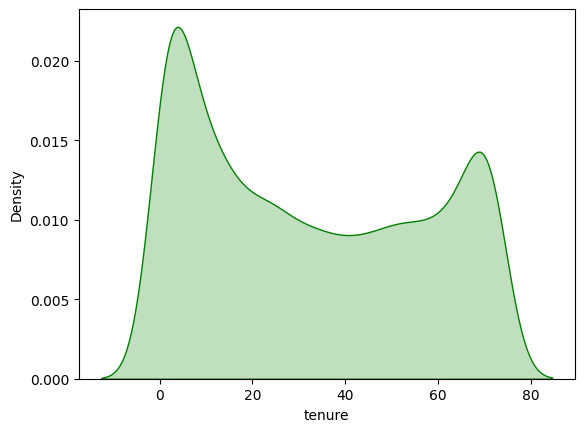

Skewness for tenure: 0.2395397495619829


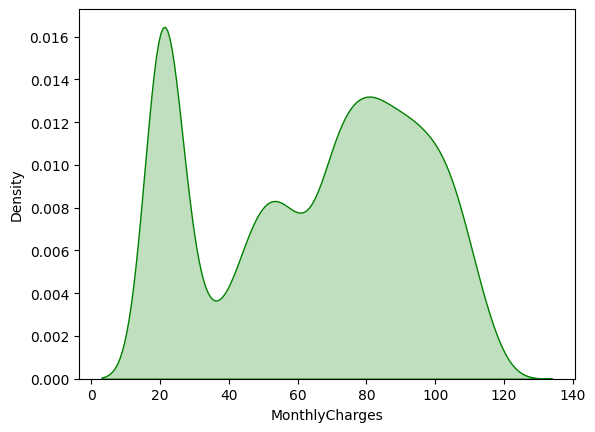

Skewness for MonthlyCharges: -0.22052443394398033


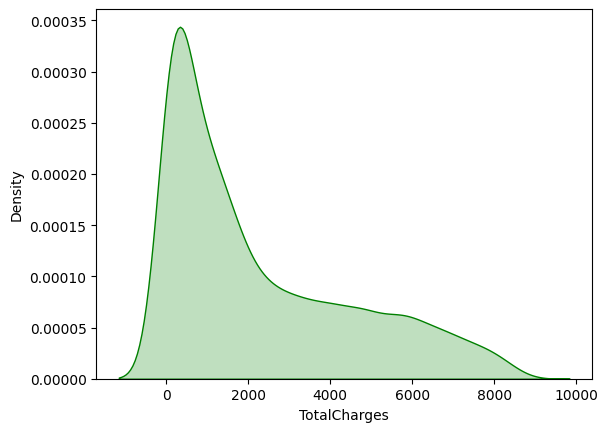

Skewness for TotalCharges: 0.9632290665827996


In [235]:
for i in ['tenure','MonthlyCharges','TotalCharges']:
  sns.kdeplot(df[i],fill=True,color='green')
  plt.show()
  #if skew=0 --> symmetric, > 0 --> right-skewed, < 0 --> left-skewed
  print(f'Skewness for {i}:',df[i].skew())

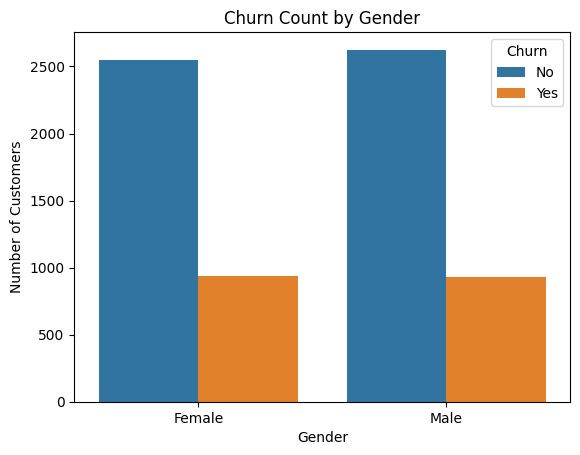

In [236]:
#hue --> splits each gender bar into two parts (churn=yes, churn=no)
#2 bars for each gender(male/female)
sns.countplot(data=df,x='gender',hue='Churn')
plt.title('Churn Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.savefig('plots/churn_gender.png')
plt.show()

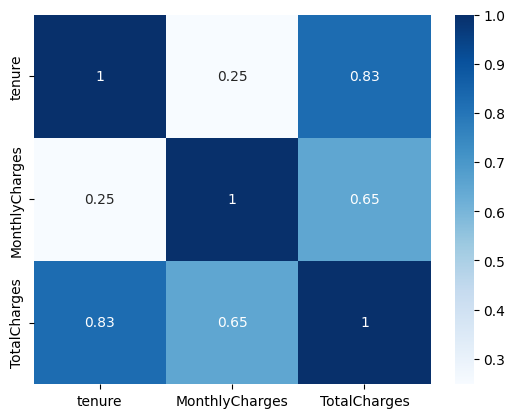

In [237]:
columns=['tenure','MonthlyCharges','TotalCharges']
sns.heatmap(df[columns].corr(),annot=True,cmap='Blues')
plt.savefig('plots/heatmap.png')
plt.show()

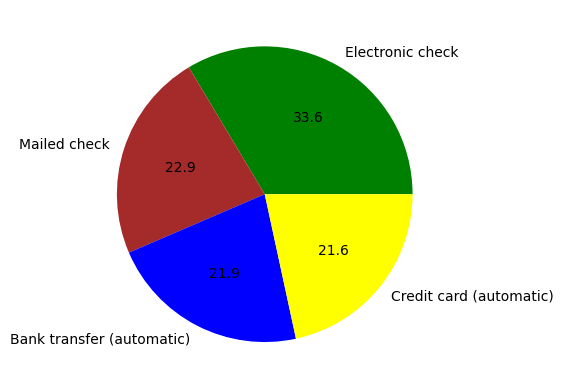

In [238]:
pay_mode=df['PaymentMethod'].value_counts()
plt.pie(pay_mode,labels=pay_mode.index,colors=['green','brown','blue','yellow'],autopct='%.1f')
plt.savefig('plots/pie.png')
plt.show()

In [239]:
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151,1


In [240]:
df["Contract"]=df["Contract"].map({"Month-to-month": 0, "One year": 1, "Two year": 2})
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,0,Yes,Electronic check,29.85,29,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,1,No,Mailed check,56.95,1889,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,0,Yes,Mailed check,53.85,108,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,1,No,Bank transfer (automatic),42.30,1840,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,0,Yes,Electronic check,70.70,151,1


In [263]:
df["SupportCalls"]=df["TechSupport"].map({"No internet service": 0, "No": 1, "Yes": 2})
df.head(11)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,SupportCalls
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,0,Yes,Electronic check,29.85,29,0,1
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,1,No,Mailed check,56.95,1889,0,1
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,0,Yes,Mailed check,53.85,108,1,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,1,No,Bank transfer (automatic),42.30,1840,0,2
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,0,Yes,Electronic check,70.70,151,1,1
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,0,Yes,Electronic check,99.65,820,1,1
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,0,Yes,Credit card (automatic),89.10,1949,0,1
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,0,No,Mailed check,29.75,301,0,1
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,0,Yes,Electronic check,104.80,3046,1,2
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,1,No,Bank transfer (automatic),56.15,3487,0,1


In [242]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

X = df[["MonthlyCharges", "tenure", "SupportCalls", "Contract"]]
y = df["Churn"]

In [243]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [244]:
model=RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [245]:
importances=pd.DataFrame({
    "Feature": X.columns,
    "Importance": model.feature_importances_
})
importances.sort_values(by="Importance", ascending=False).reset_index(drop=True)

,Feature,Importance
0,MonthlyCharges,0.551765
1,tenure,0.285907
2,Contract,0.116646
3,SupportCalls,0.045681


In [258]:
customer=pd.DataFrame({
    "MonthlyCharges": [70],
    "tenure": [8],
    "SupportCalls": [4],   
    "Contract": [0]          
})

prediction=model.predict(customer)[0]

print("Predicted Churn:", "Yes" if prediction == 1 else "No")

Predicted Churn: No


In [252]:
y_pred = model.predict(X_test)

print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))

Accuracy: 0.768


In [253]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.85      1036
           1       0.57      0.48      0.52       373

    accuracy                           0.77      1409
   macro avg       0.70      0.68      0.69      1409
weighted avg       0.76      0.77      0.76      1409



In [254]:
y_proba = model.predict_proba(X_test)[:, 1]

print("ROC AUC Score:", round(roc_auc_score(y_test, y_proba), 3))

ROC AUC Score: 0.798


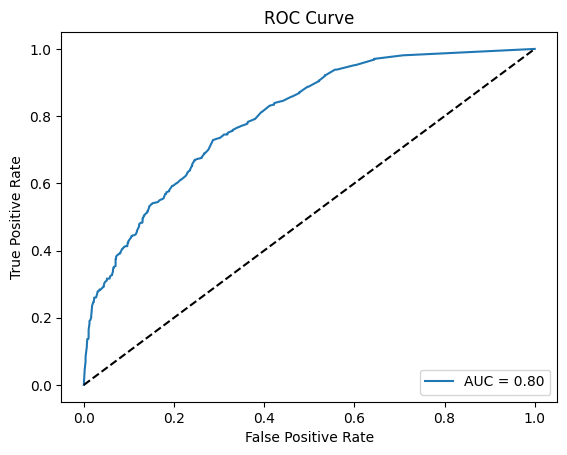

In [256]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

#AUC=0.8 --> strong performance
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.savefig('plots/roc.png')
plt.show()

In [261]:
with open('model.pkl', 'wb') as f:
    pickle.dump((model), f)

with open('scaler.pkl', 'wb') as f:
    pickle.dump((scaler), f)